# Medical Geography @ NTNU
<font size='4.7'><b>Asst. Prof. Chan, Chun-Hsiang</b></font><br/>
<font size='3.5'><i>Department of Geography, National Taiwan Normal University, Taipei, Taiwan.</i></font><br/><br/>
This is a demo class for simple data preprocessing and visualization practice. <br/>
If you want to run this code, then please download the COVID-19 dataset as following link. <br/>
<a href='https://github.com/CSSEGISandData/COVID-19.git'>https://github.com/CSSEGISandData/COVID-19.git</a><br/>
If you have any question about this code, plz feel free to ask me.<br/>
Email: chchan@ntnu.edu.tw

## Initialization

In [1]:
# import packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import geopandas as gpd
import geodatasets
import contextily as cx

In [2]:
# load data
os.chdir('/Users/toodou/Documents/python/medGeog/COVID-19/csse_covid_19_data/csse_covid_19_time_series/')
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
# preview dataset
df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

## Province Scale: Anhui Province, China

In [3]:
# extract China data
chn = df[df['Country/Region']=='China'].reset_index(drop=True)
# preview dataset
chn.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0          Anhui          China  31.8257  117.2264        1        9       15   
1        Beijing          China  40.1824  116.4142       14       22       36   
2      Chongqing          China  30.0572  107.8740        6        9       27   
3         Fujian          China  26.0789  117.9874        1        5       10   
4          Gansu          China  35.7518  104.2861        0        2        2   

   1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0       39       60       70  ...     2275    2275    2275    2275    2275   
1       41       68       80  ...    40774   40774   40774   40774   40774   
2       57       75      110  ...    14715   14715   14715   14715   14715   
3       18       35       59  ...    17122   17122   17122   17122   17122   
4        4        7       14  ...     1742    1742    1742    1742    1742   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    2275    2275    2275    2275    2275  
1   40774   40774   40774   40774   40774  
2   14715   14715   14715   14715   14715  
3   17122   17122   17122   17122   17122  
4    1742    1742    1742    1742    1742  

[5 rows x 1147 columns]

In [4]:
# extract Anhui Province data
anhui = chn.iloc[0,4:].values
# transform cumulative confirmed case number to new confirmed case number
ah = anhui[1:len(anhui)] - anhui[0:len(anhui)-1]
# re-add the first day data
day1 = np.array(1)
# add original anhui data into day 1
ah = np.append(day1, ah)
# preview result
ah

array([1, 8, 6, ..., 0, 0, 0], dtype=object)

In [5]:
# get the datetime info
day = chn.columns[4:].values
# preview datatime info
day

array(['1/22/20', '1/23/20', '1/24/20', ..., '3/7/23', '3/8/23', '3/9/23'],
      dtype=object)

In [6]:
# concatentate datetime and anhui data together with column stack, then transform as a pandas dataframe
ah1 = pd.DataFrame.from_records(np.column_stack([day, ah]), columns=['datetime','confirmed'])
# transform datetime format
ah1['datetime'] = pd.to_datetime(ah1['datetime'])
# preview dataset
ah1.head()

datetime  confirmed
0 2020-01-22          1
1 2020-01-23          8
2 2020-01-24          6
3 2020-01-25         24
4 2020-01-26         21

/var/folders/8d/b_8krth91pb4r1gwzr_my9k00000gn/T/ipykernel_59347/4270235067.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


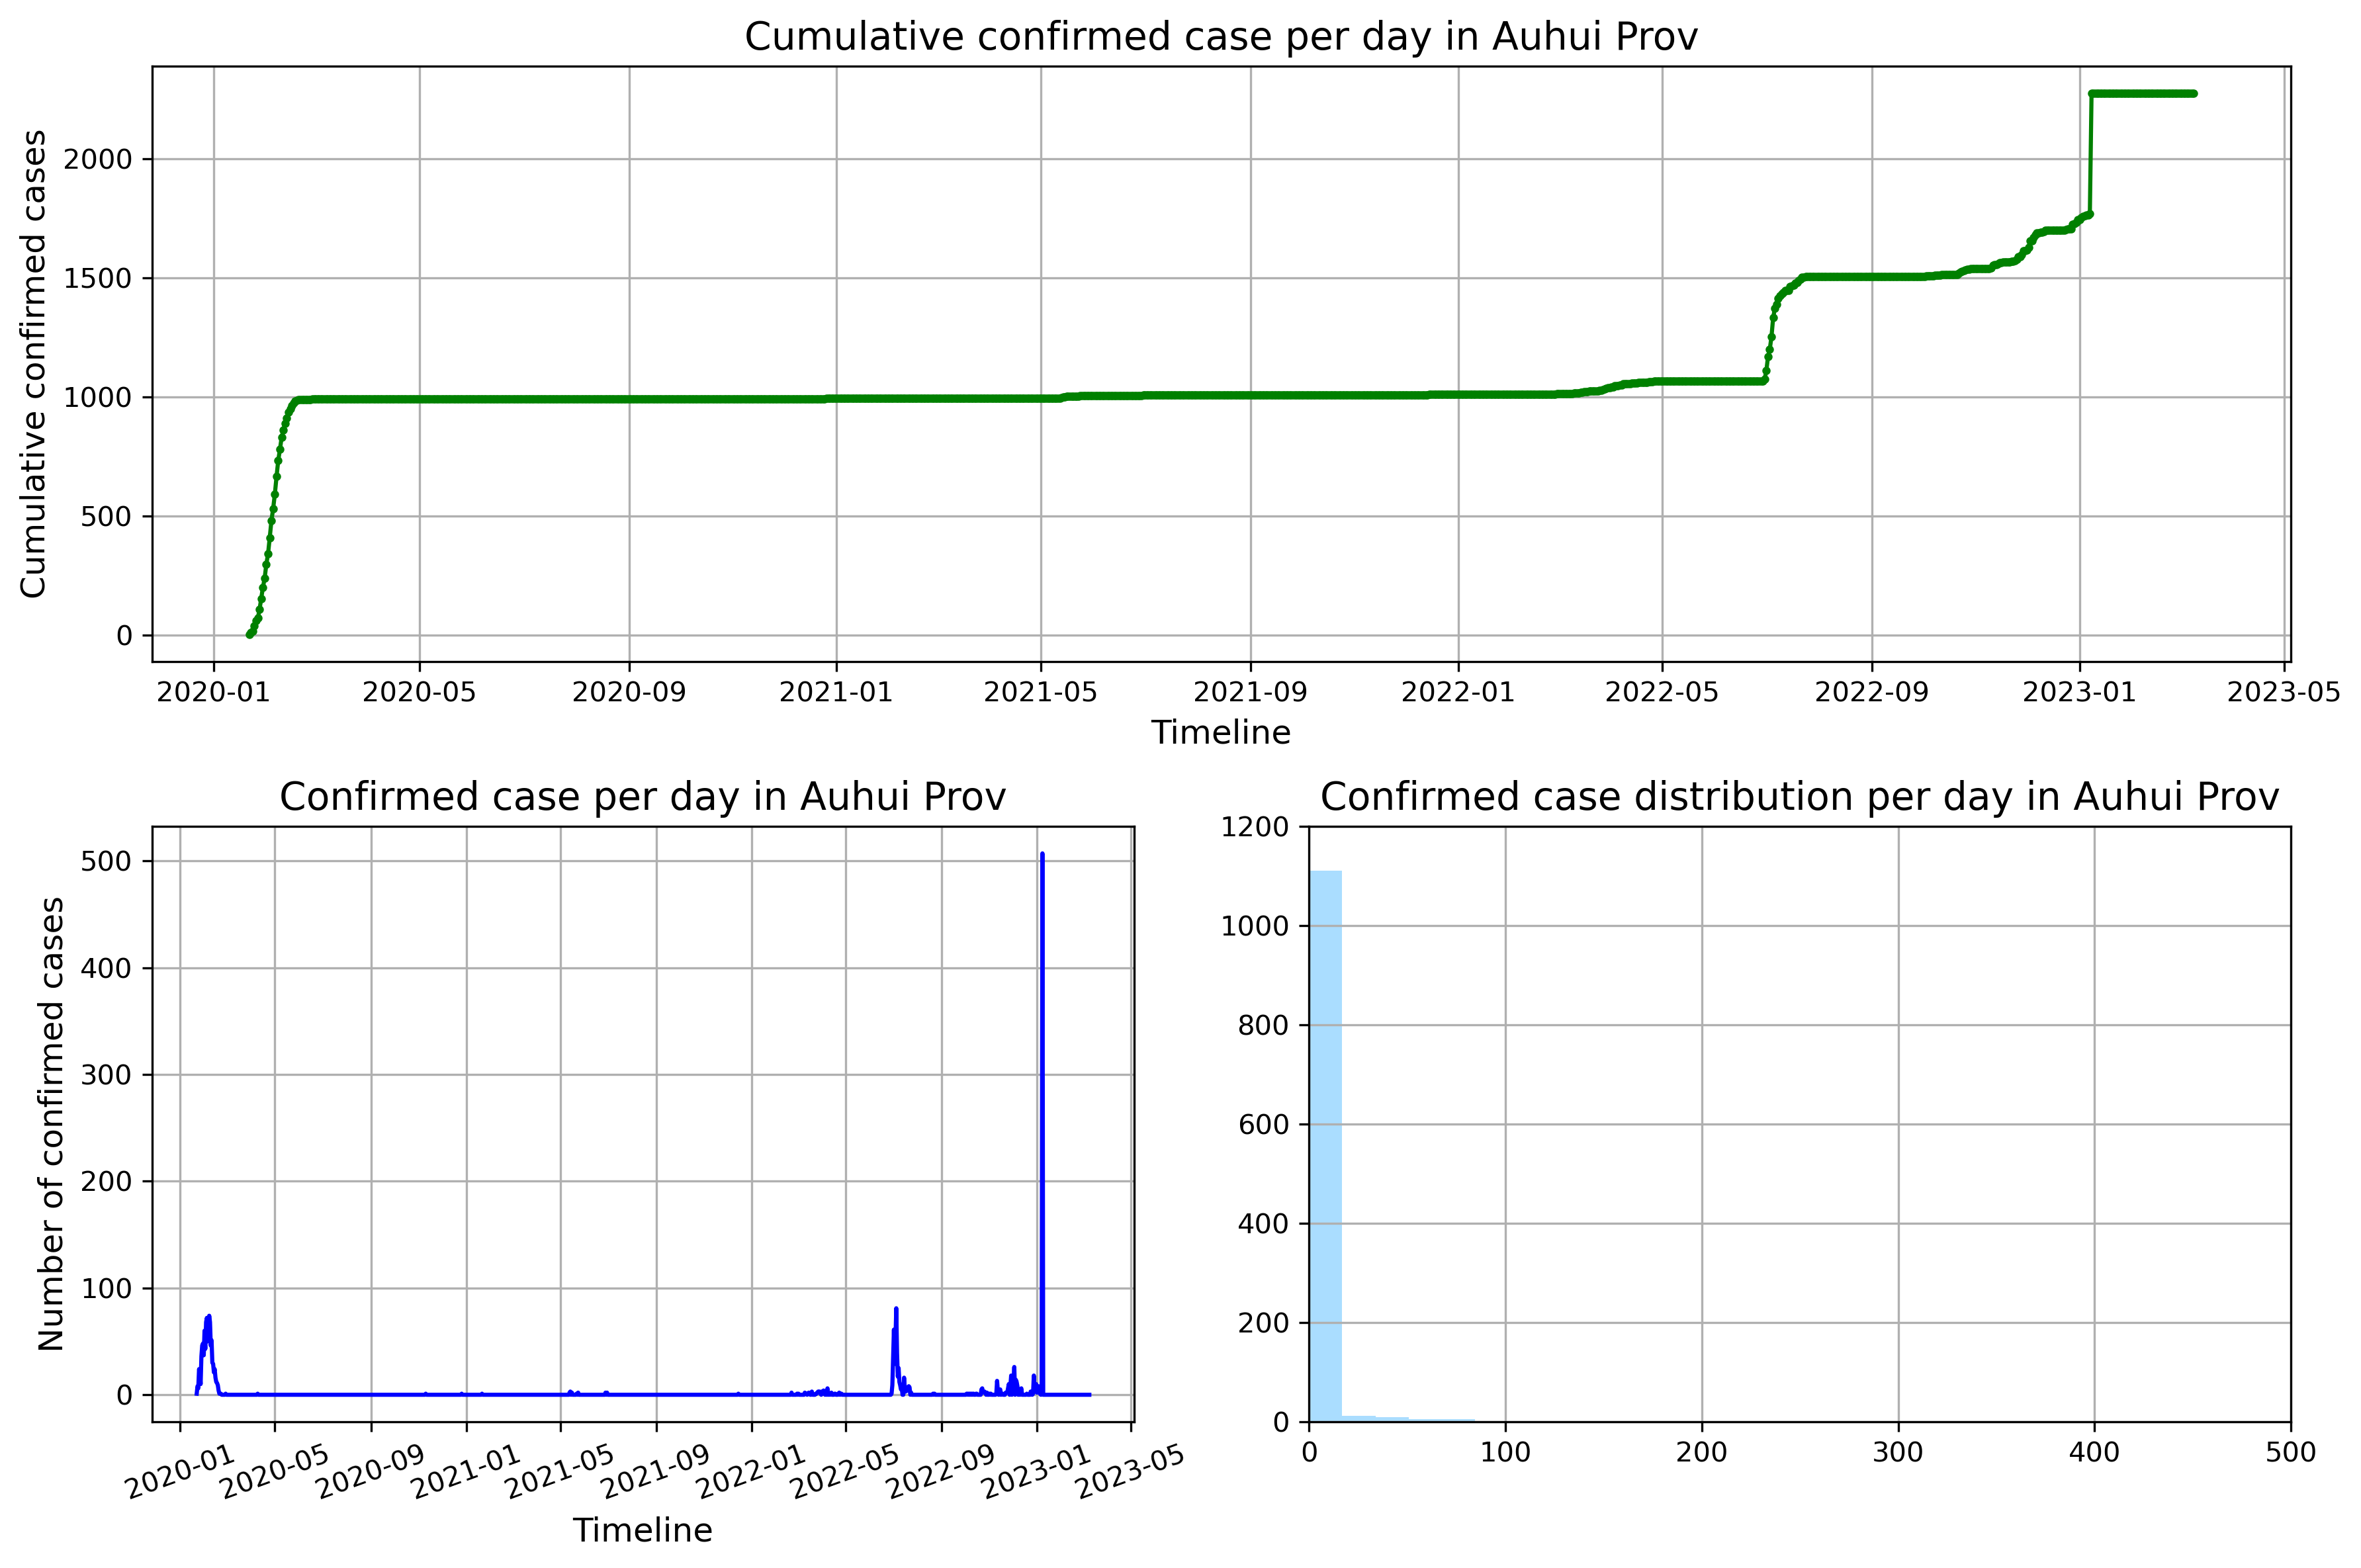

In [7]:
# plot the daily case number and the case number distribution of anhui province
plt.subplots(figsize=[12,8], dpi=300)
# subplot 1: defined as 2 rows and 1 columns <= it means that 221 and 222 will be merged
plt.subplot(2,1,1)
plt.plot(ah1['datetime'],  anhui, 'o-g', markersize=2)
# set title
plt.title('Cumulative confirmed case per day in Auhui Prov', fontsize=14)
# set x label
plt.xlabel('Timeline', fontsize=12)
# set y label
plt.ylabel('Cumulative confirmed cases', fontsize=12)
# set grid
plt.grid(True)

# subplot 2: defined as 2 rows and 2 columns
plt.subplot(2,2,3)
# line plot with datetime as x and confirmed case number as y by using blue color
plt.plot(ah1['datetime'], ah1['confirmed'], 'b')
# set title
plt.title('Confirmed case per day in Auhui Prov', fontsize=14)
# set x label
plt.xlabel('Timeline', fontsize=12)
# set y label
plt.ylabel('Number of confirmed cases', fontsize=12)
# rotate x ticks with 20 degrees
plt.xticks(rotation=20)
# set grid
plt.grid(True)

# subplot 3
plt.subplot(2,2,4)
# histogram with 30 bins
plt.hist(ah1['confirmed'], bins=30, facecolor='#AADDFF')
# set title
plt.title('Confirmed case distribution per day in Auhui Prov', fontsize=14)
# set x and y axis limits
plt.axis([0, 500, 0, 1200])
# set grid
plt.grid(True)

# set tight layout
plt.tight_layout()
# preview
plt.show()

## A Country Scale: Australia

In [8]:
# count number of countries
print('number of countries:', len(df['Country/Region'].drop_duplicates()))
# count number of date in the dataset
print('number of dates:',len(df.columns)-4)

number of countries: 201
number of dates: 1143


In [9]:
# pick up a country for demo
aus = df[df['Country/Region']=='Australia'].reset_index(drop=True)
# show all values
aus['Province/State'].values

array(['Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'], dtype=object)

In [10]:
# fetch australia data with transpose amd reset index
aus_ = aus.iloc[:,4:].T.reset_index()
# set column name
aus_.columns = ['Timeline','Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia']
# transform datetime
aus_['Timeline'] = pd.to_datetime(aus_['Timeline'])
# preview dataset
aus_.head()

Timeline  Australian Capital Territory  New South Wales  \
0 2020-01-22                             0                0   
1 2020-01-23                             0                0   
2 2020-01-24                             0                0   
3 2020-01-25                             0                0   
4 2020-01-26                             0                3   

   Northern Territory  Queensland  South Australia  Tasmania  Victoria  \
0                   0           0                0         0         0   
1                   0           0                0         0         0   
2                   0           0                0         0         0   
3                   0           0                0         0         0   
4                   0           0                0         0         1   

   Western Australia  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

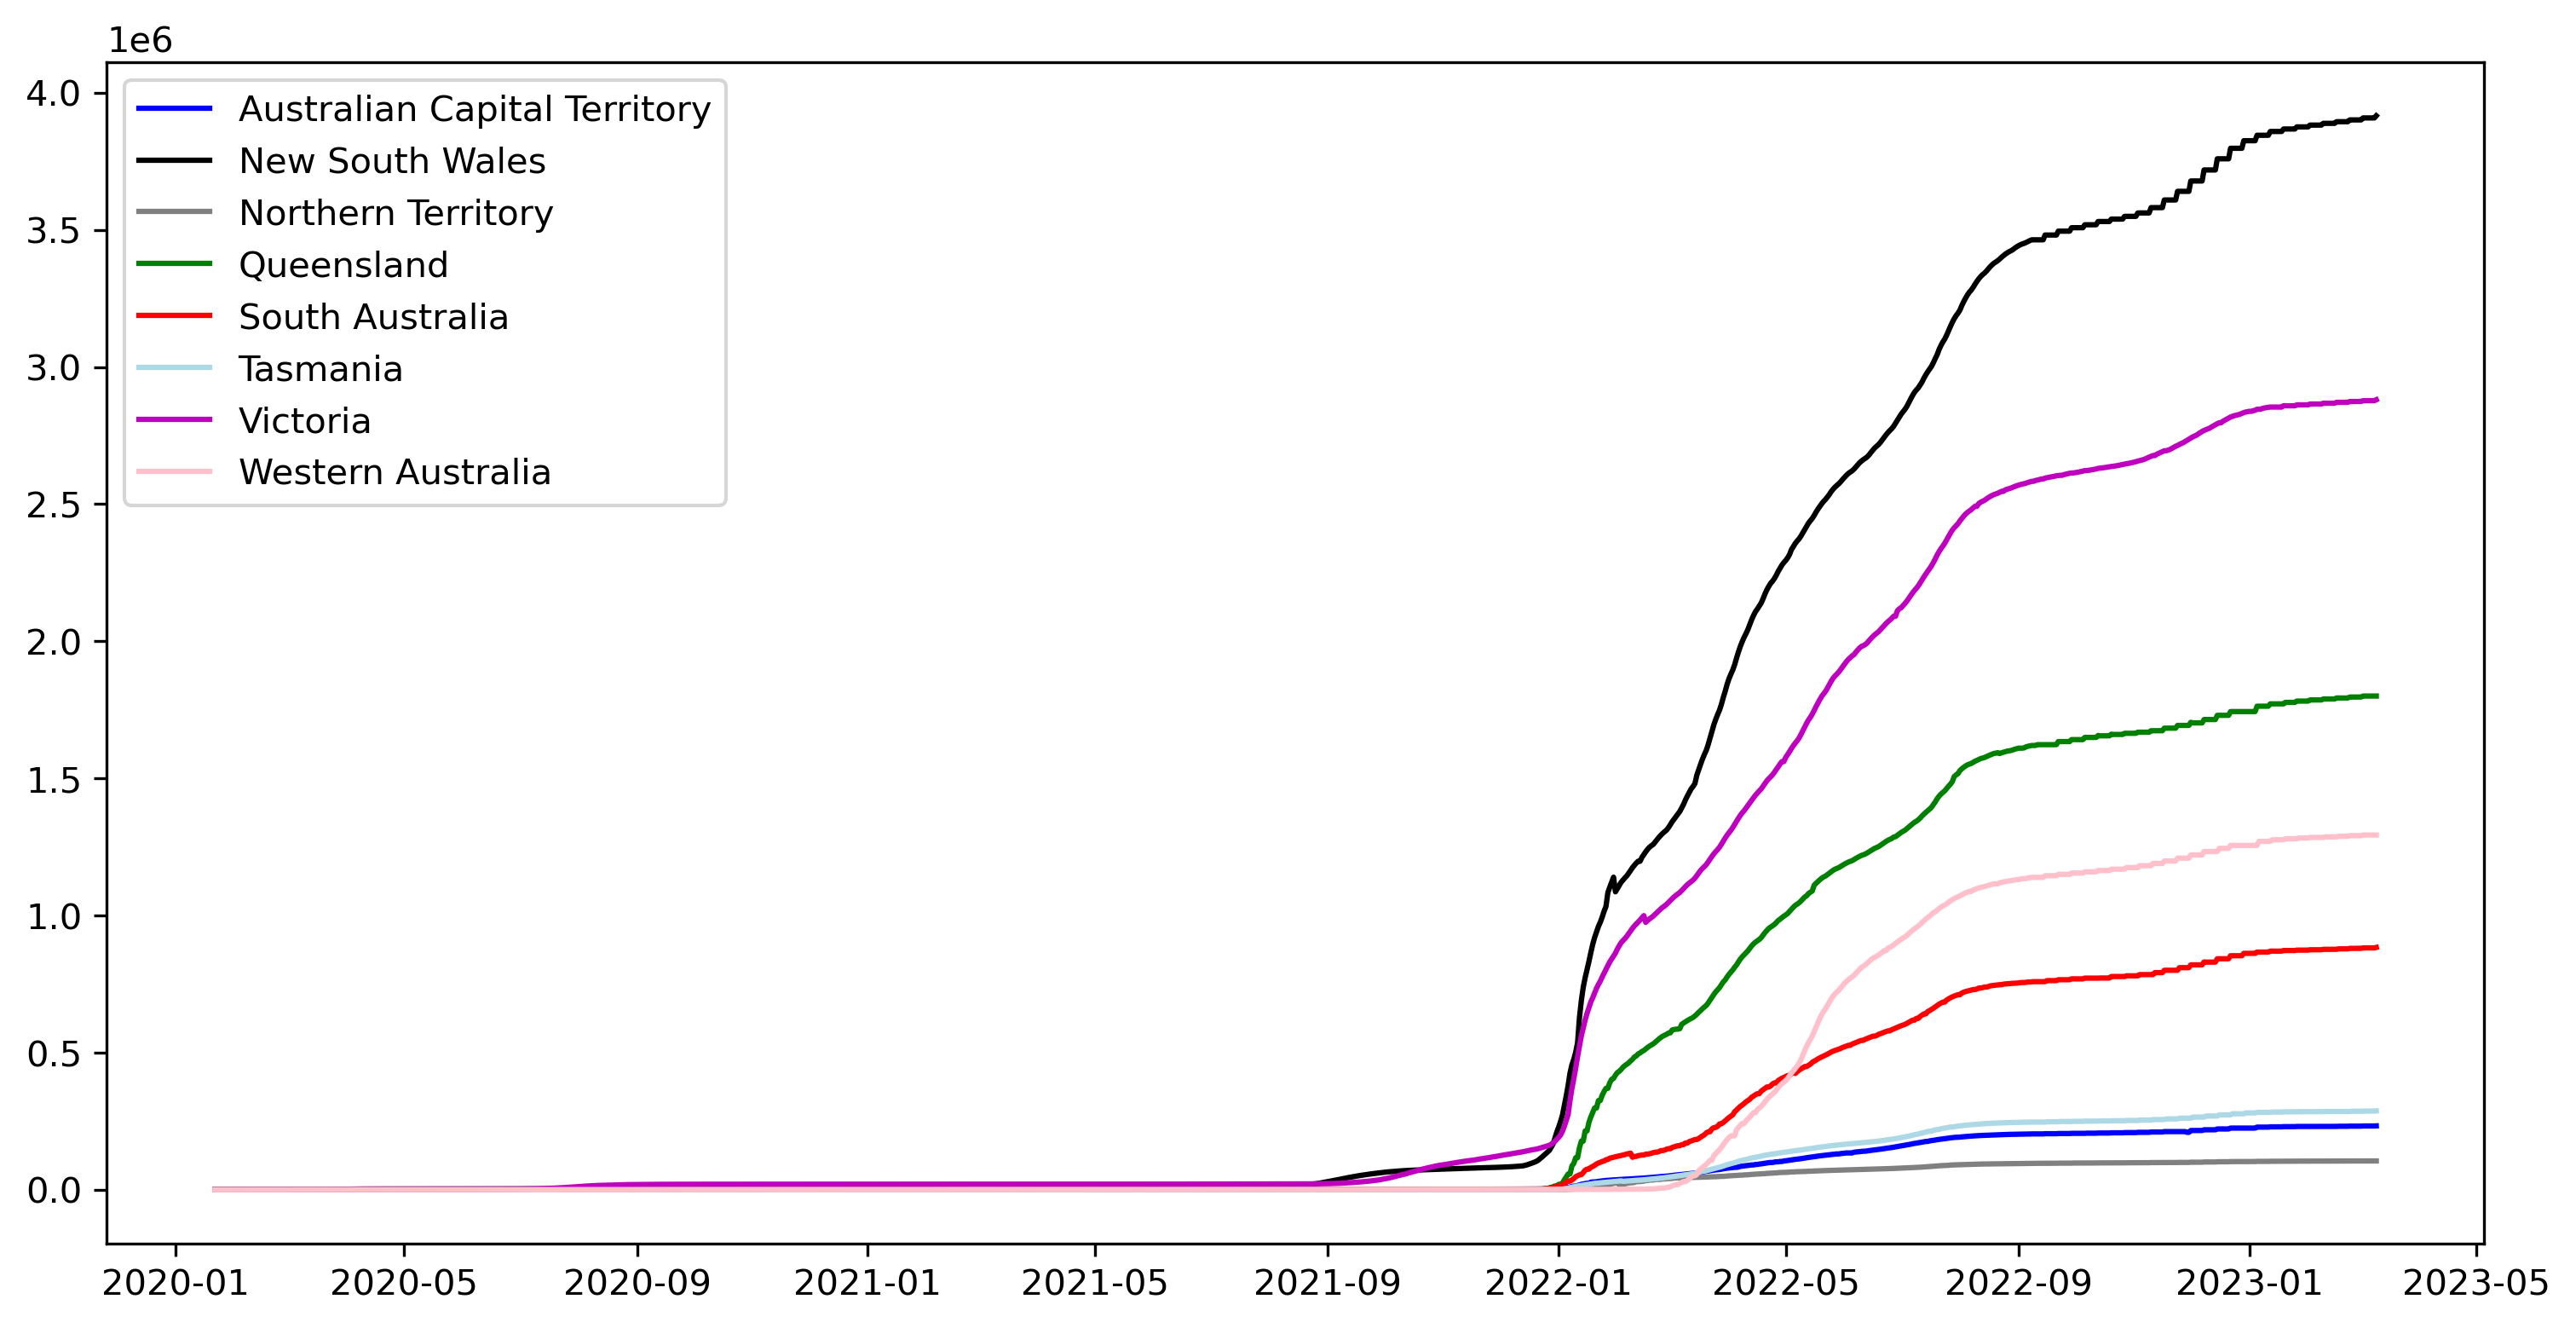

In [11]:
# plot aus data
plt.figure(figsize=[12,6], dpi=300)
plt.plot(aus_['Timeline'], aus_['Australian Capital Territory'], 'b', label='Australian Capital Territory')
plt.plot(aus_['Timeline'], aus_['New South Wales'], 'k', label='New South Wales')
plt.plot(aus_['Timeline'], aus_['Northern Territory'], 'gray', label='Northern Territory')
plt.plot(aus_['Timeline'], aus_['Queensland'], 'g', label='Queensland')
plt.plot(aus_['Timeline'], aus_['South Australia'], 'r', label='South Australia')
plt.plot(aus_['Timeline'], aus_['Tasmania'], 'lightblue', label='Tasmania')
plt.plot(aus_['Timeline'], aus_['Victoria'], 'm', label='Victoria')
plt.plot(aus_['Timeline'], aus_['Western Australia'], 'pink', label='Western Australia')
# show legend
plt.legend()
plt.show()

In [12]:
# calculate the number of cases per day
aus1 = aus_.iloc[1:,1:].reset_index(drop=True) - aus_.iloc[:-1,1:].reset_index(drop=True)
aus2 = aus1.iloc[1:-1,:]
aus2['Timeline'] = aus_['Timeline'][1:-1]
aus2

Australian Capital Territory  New South Wales  Northern Territory  \
1                                0                0                   0   
2                                0                0                   0   
3                                0                3                   0   
4                                0                1                   0   
5                                0                0                   0   
...                            ...              ...                 ...   
1136                             0                0                   0   
1137                             0                0                   0   
1138                             0                0                   0   
1139                             0                0                   0   
1140                             0                0                   0   

      Queensland  South Australia  Tasmania  Victoria  Western Australia  \
1              0                0         0         0                  0   
2              0                0         0         0                  0   
3              0                0         0         1                  0   
4              0                0         0         0                  0   
5              0                0         0         0                  0   
...          ...              ...       ...       ...                ...   
1136           0                0         0         0                  0   
1137           0                0         0         0                  0   
1138           0                0         0         0                  0   
1139           0                0         0         0                  0   
1140           0                0         0         0                  0   

       Timeline  
1    2020-01-23  
2    2020-01-24  
3    2020-01-25  
4    2020-01-26  
5    2020-01-27  
...         ...  
1136 2023-03-03  
1137 2023-03-04  
1138 2023-03-05  
1139 2023-03-06  
1140 2023-03-07  

[1140 rows x 9 columns]

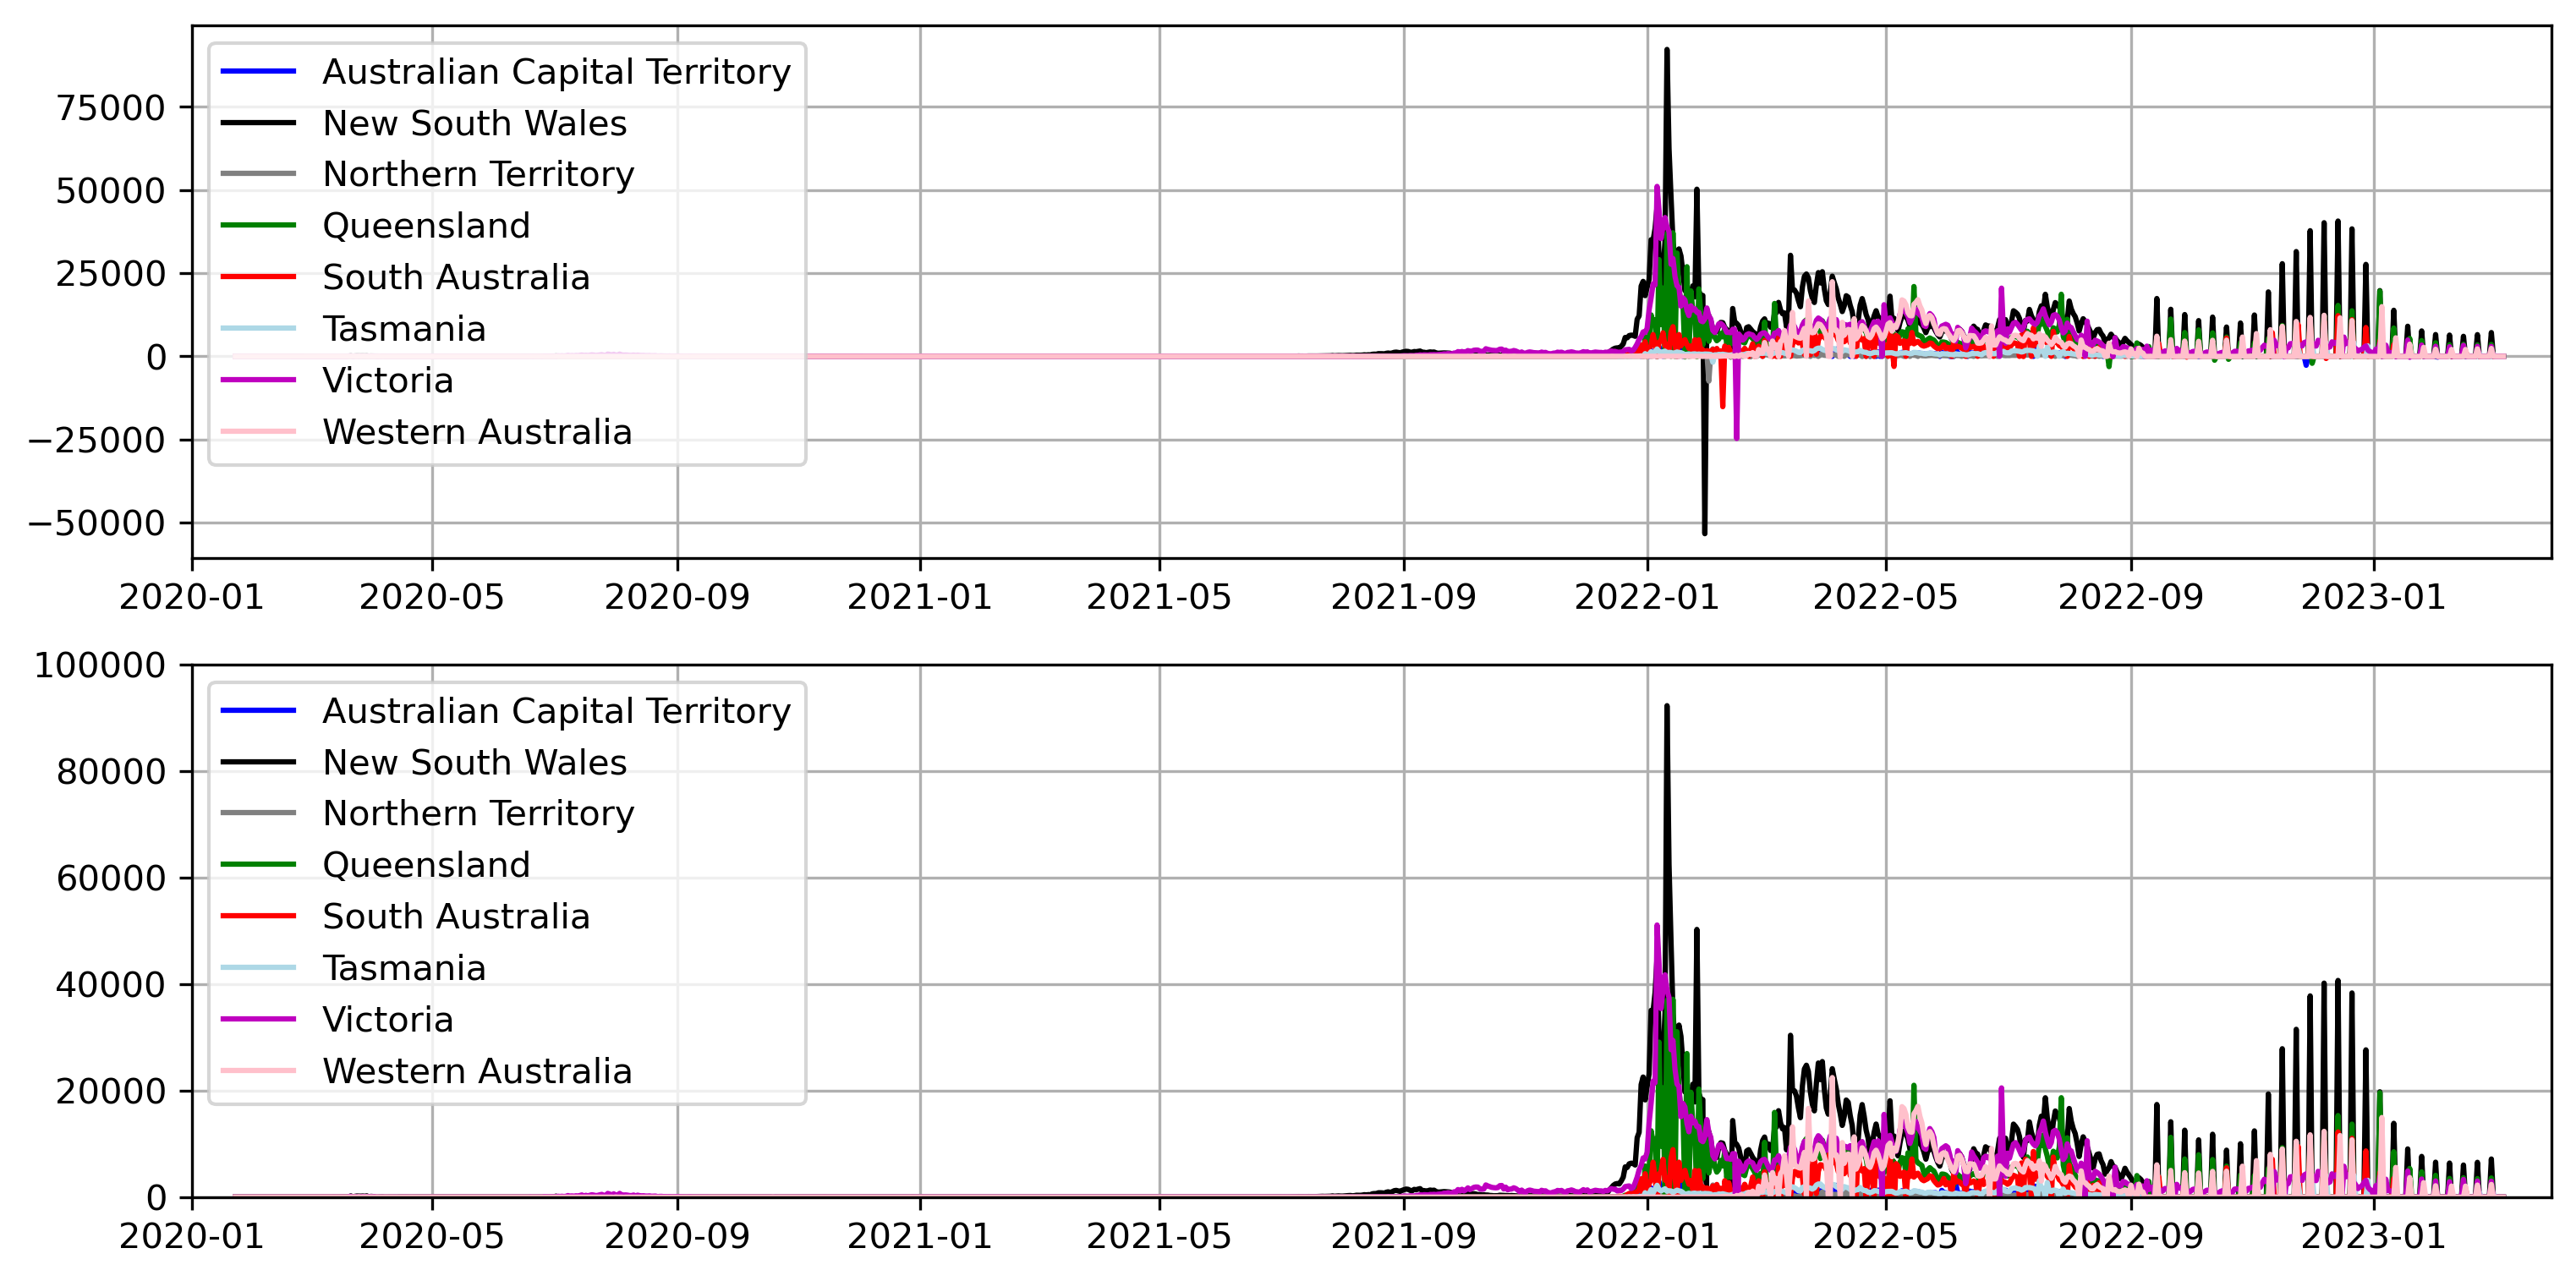

In [13]:
# plot aus data
# set figure size and resolution
plt.figure(figsize=[12,6], dpi=300)
# subplot 1 with 2 rows and 1 column
plt.subplot(211)
# plot all province data
plt.plot(aus2['Timeline'], aus2['Australian Capital Territory'], 'b', label='Australian Capital Territory')
plt.plot(aus2['Timeline'], aus2['New South Wales'], 'k', label='New South Wales')
plt.plot(aus2['Timeline'], aus2['Northern Territory'], 'gray', label='Northern Territory')
plt.plot(aus2['Timeline'], aus2['Queensland'], 'g', label='Queensland')
plt.plot(aus2['Timeline'], aus2['South Australia'], 'r', label='South Australia')
plt.plot(aus2['Timeline'], aus2['Tasmania'], 'lightblue', label='Tasmania')
plt.plot(aus2['Timeline'], aus2['Victoria'], 'm', label='Victoria')
plt.plot(aus2['Timeline'], aus2['Western Australia'], 'pink', label='Western Australia')
# set x limits
plt.xlim([dt.datetime(2020,1,1), dt.datetime(2023,3,31)])
# show the grid
plt.grid(True)
# show the legend with pre-defined location
plt.legend(loc='upper left')

# subplot 2
plt.subplot(212)
# plot all province data
plt.plot(aus2['Timeline'], aus2['Australian Capital Territory'], 'b', label='Australian Capital Territory')
plt.plot(aus2['Timeline'], aus2['New South Wales'], 'k', label='New South Wales')
plt.plot(aus2['Timeline'], aus2['Northern Territory'], 'gray', label='Northern Territory')
plt.plot(aus2['Timeline'], aus2['Queensland'], 'g', label='Queensland')
plt.plot(aus2['Timeline'], aus2['South Australia'], 'r', label='South Australia')
plt.plot(aus2['Timeline'], aus2['Tasmania'], 'lightblue', label='Tasmania')
plt.plot(aus2['Timeline'], aus2['Victoria'], 'm', label='Victoria')
plt.plot(aus2['Timeline'], aus2['Western Australia'], 'pink', label='Western Australia')
# set x and y limits
plt.axis([dt.datetime(2020,1,1), dt.datetime(2023,3,31), 0, 100000])
# show the grid
plt.grid(True)
# show the legend
plt.legend()
# show the figure
plt.show()

## Discussion
<font size='4'>According to the above figure, why we have negative case number?</font>

## A Global Scale

In [14]:
# extract the necessary data
df1 = df[['Country/Region','Lat','Long','6/15/21']]
# preview dataset
df1.head()

Country/Region       Lat       Long  6/15/21
0    Afghanistan  33.93911  67.709953    93272
1        Albania  41.15330  20.168300   132469
2        Algeria  28.03390   1.659600   134115
3        Andorra  42.50630   1.521800    13828
4         Angola -11.20270  17.873900    36921

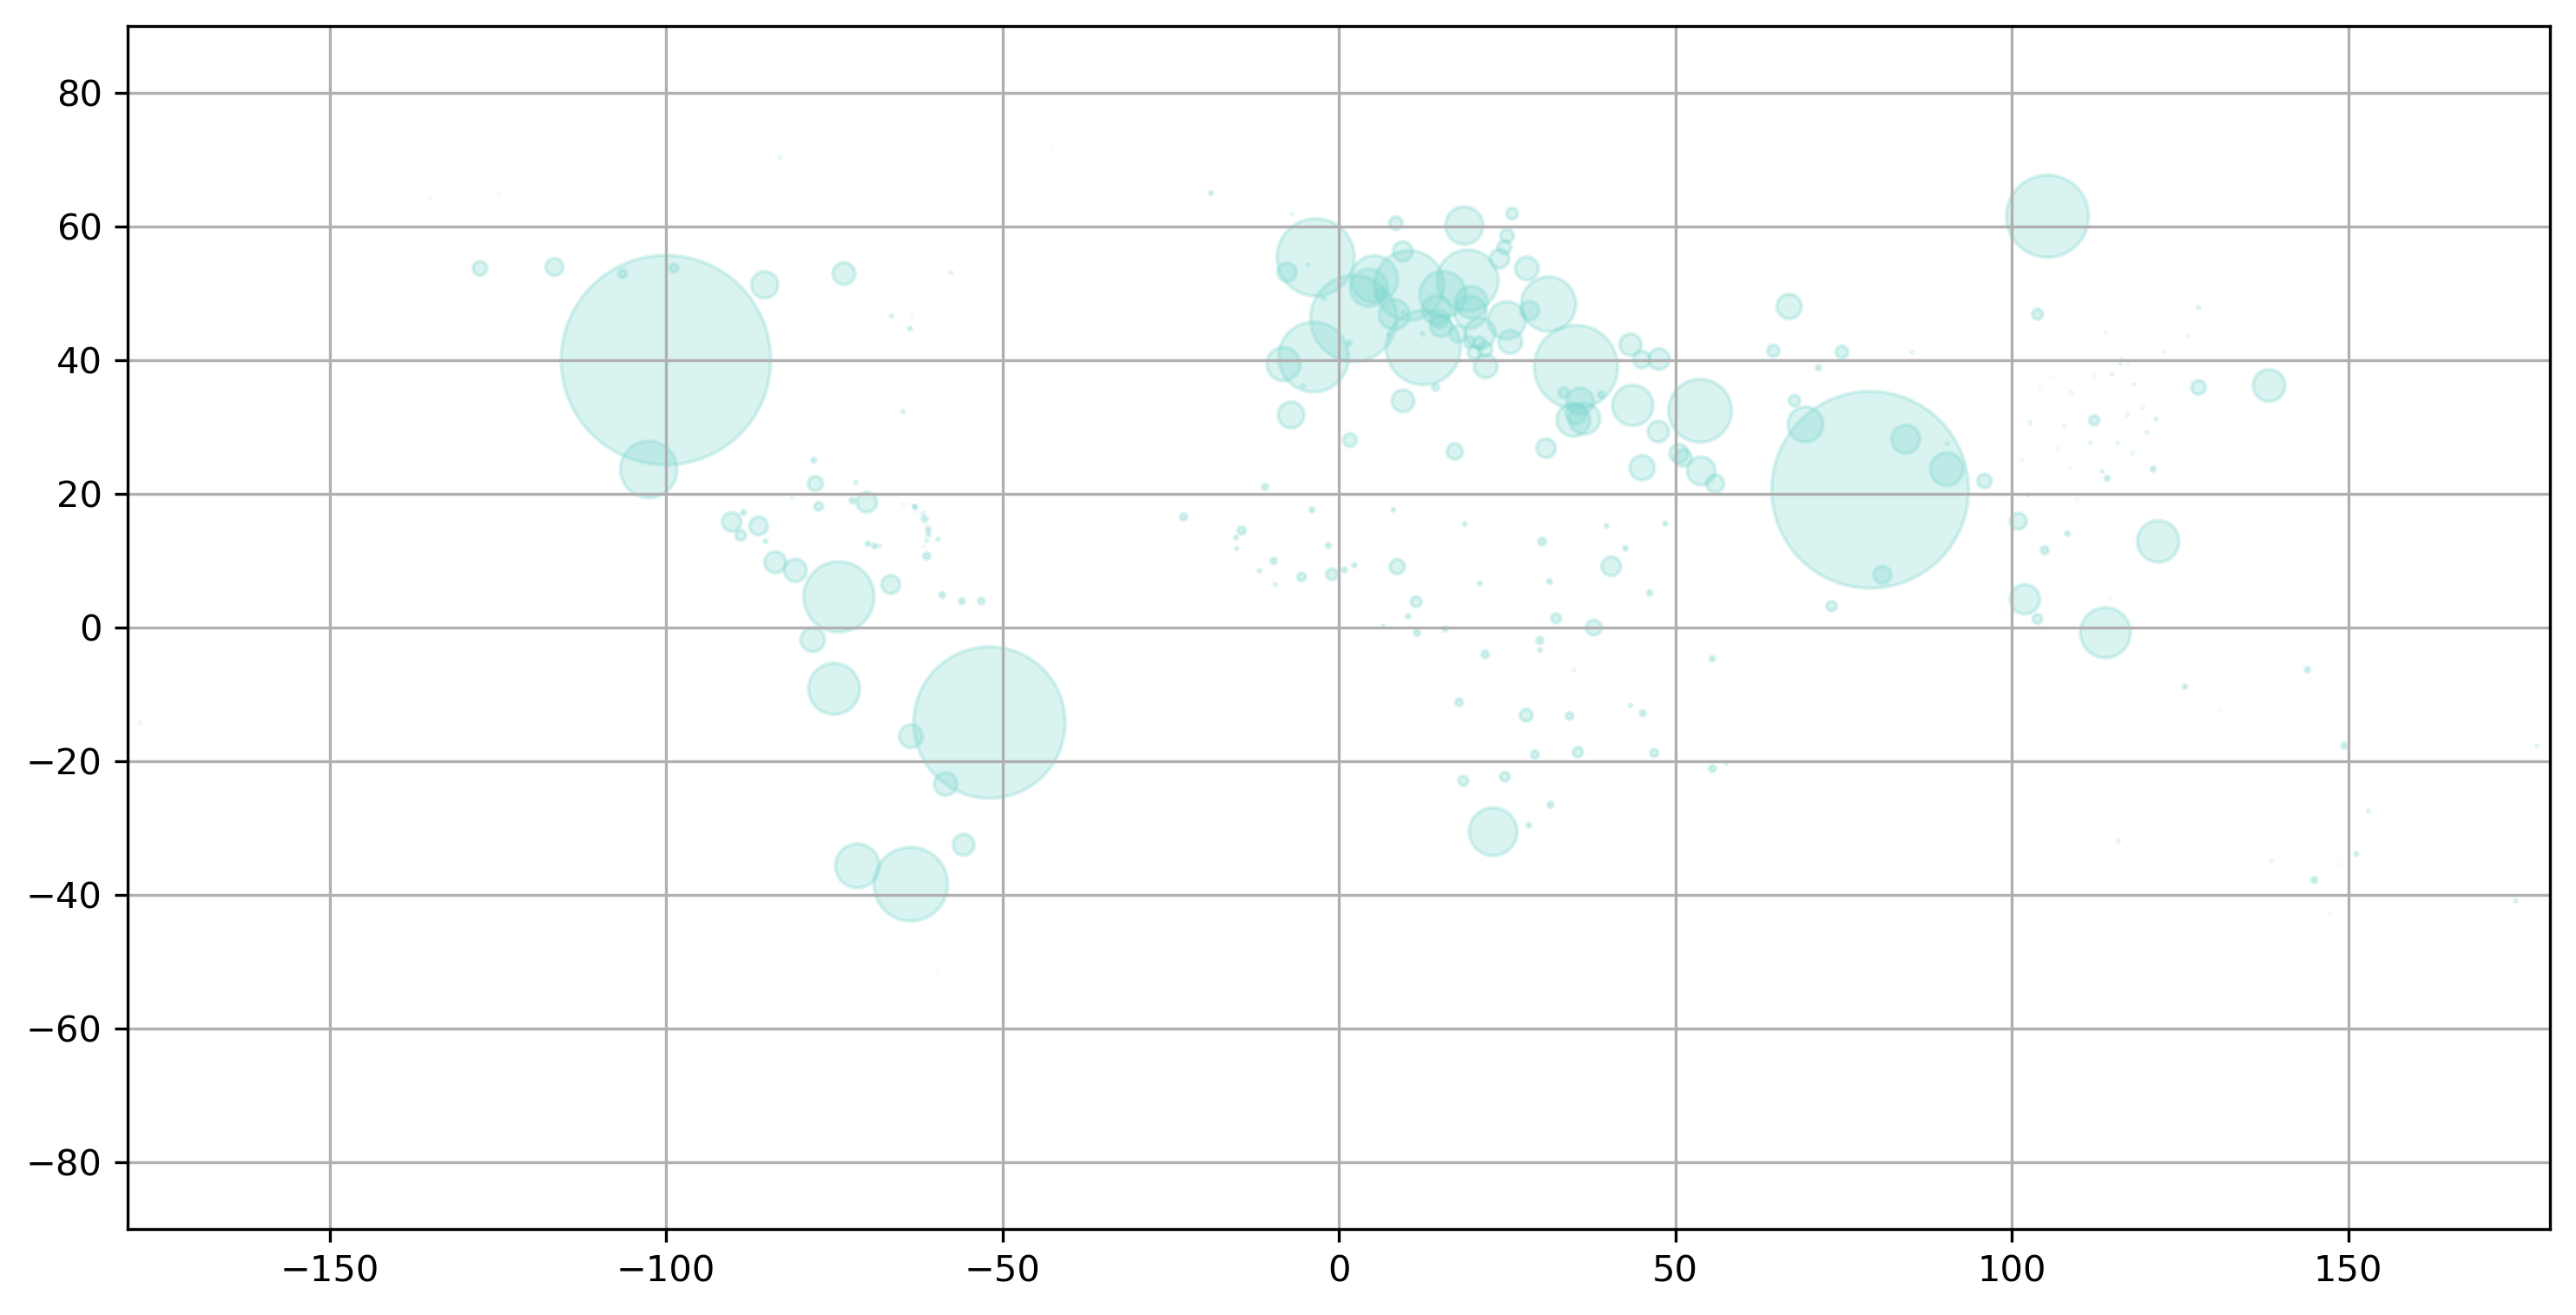

In [15]:
# plot cumulative case number around the world
# set figure size and resolution
plt.figure(figsize=[12,6], dpi=300)
# scatter plot: x, y, marker size, marker color, transparency
plt.scatter(df['Long'], df['Lat'], s=df['6/15/21']/10000, c='#81D8D0', alpha=0.3)
# add country/region name
# for i in range(df.shape[0]):
#     plt.text(df['Long'][i], df['Lat'][i], df['Country/Region'][i])
# set axis limits
plt.axis([-180, 180, -90, 90]) # list -> [xmin, xmax, ymin, ymax]
# show the grid
plt.grid(True)
# show the figure
plt.show()

In [16]:
# transform pandas dataframe into geopandas dataframe with setting geometry and crs
gdf = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(x=df1.Long, y=df1.Lat), crs = 'epsg:4326')
# an alternative method for setting crs (projected coordination system)
# gdf = gdf.to_crs(epsg=3857)
# preview dataset
gdf.head()

Country/Region       Lat       Long  6/15/21                    geometry
0    Afghanistan  33.93911  67.709953    93272   POINT (67.70995 33.93911)
1        Albania  41.15330  20.168300   132469   POINT (20.16830 41.15330)
2        Algeria  28.03390   1.659600   134115    POINT (1.65960 28.03390)
3        Andorra  42.50630   1.521800    13828    POINT (1.52180 42.50630)
4         Angola -11.20270  17.873900    36921  POINT (17.87390 -11.20270)

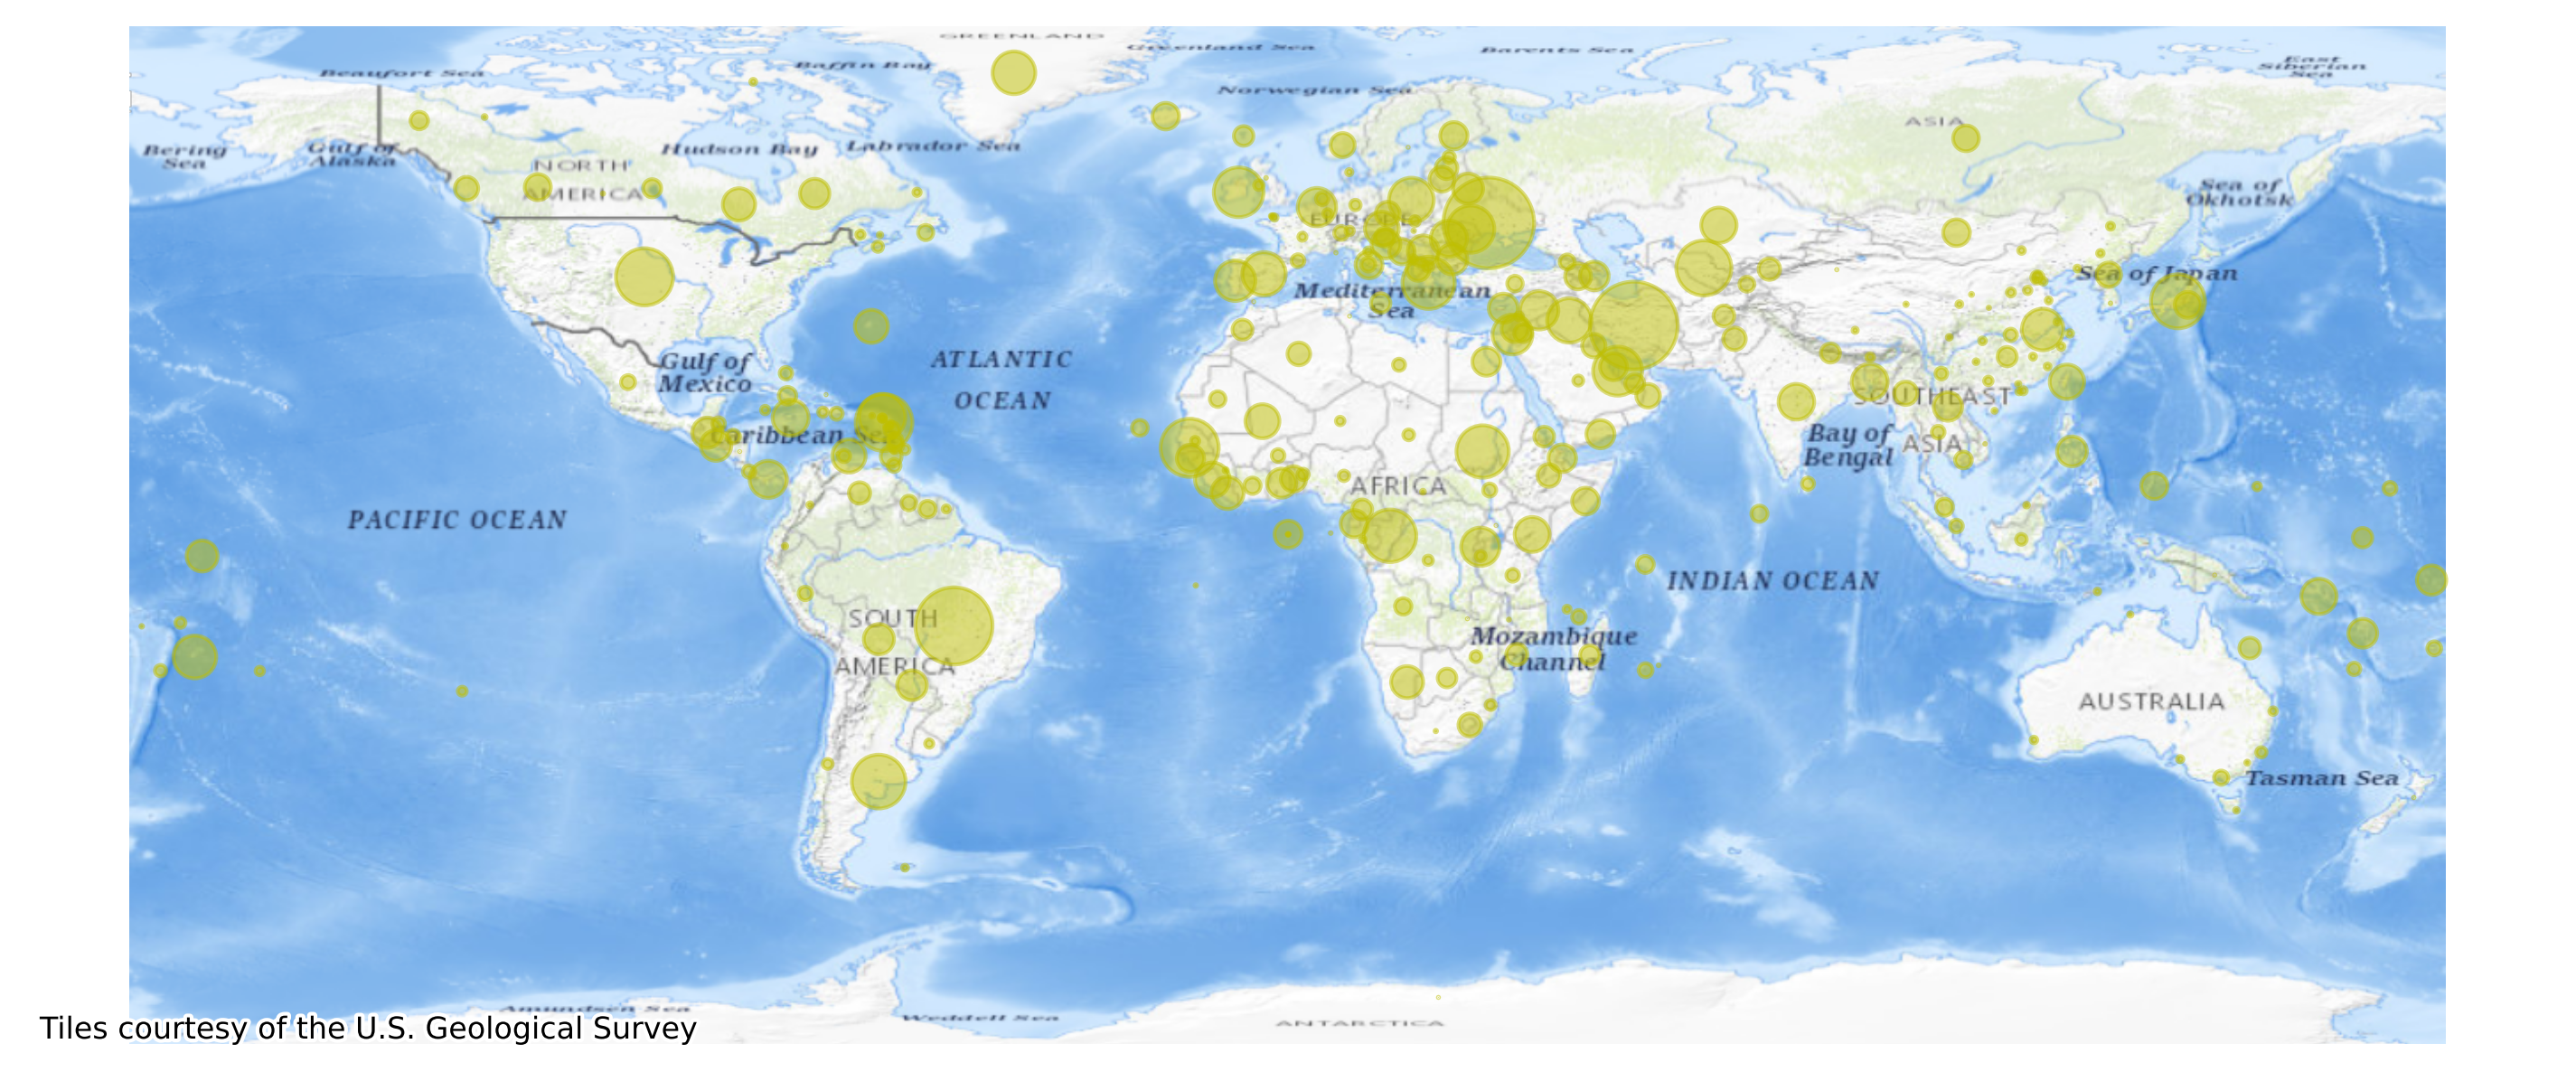

In [17]:
# set figure size and resolution
fig, ax = plt.subplots(figsize=[12,6], dpi=300)
# scatter: all cumulative case number around the world
gdf.plot(ax=ax, facecolor='y', markersize=np.sqrt(gdf['6/15/21']+1)/10, alpha=0.5)
# add basemap
cx.add_basemap(ax, crs=gdf.crs.to_string(), alpha=1, source=cx.providers.USGS.USTopo)
# show the figure
plt.axis('off')
plt.show()

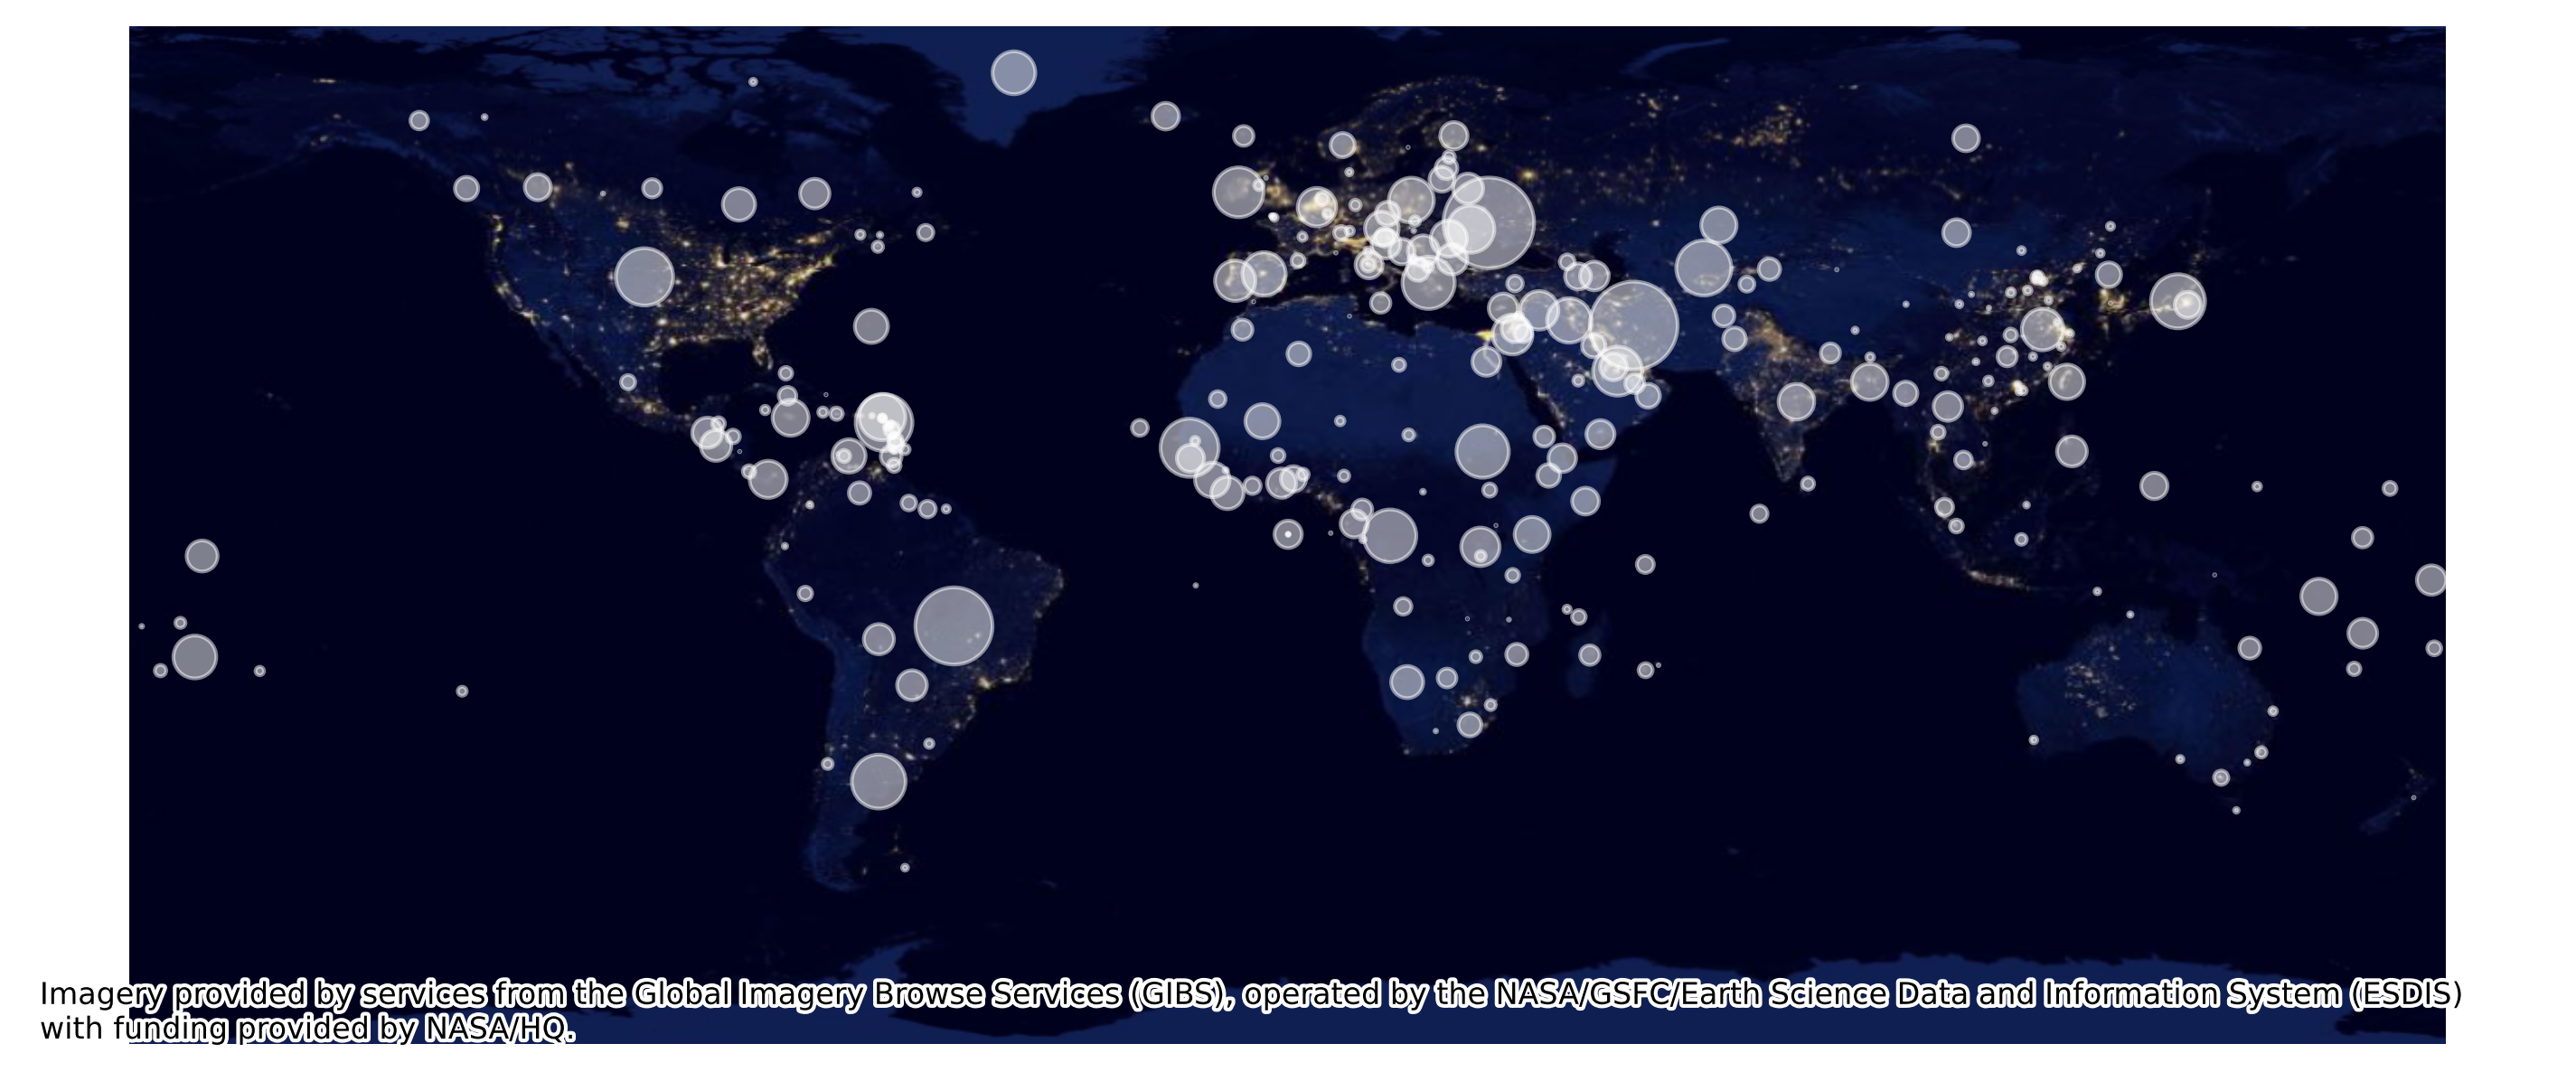

In [18]:
# set figure size and resolution
fig, ax = plt.subplots(figsize=[12,6], dpi=300)
# scatter: all cumulative case number around the world
gdf.plot(ax=ax, facecolor='w', markersize=np.sqrt(gdf['6/15/21']+1)/10, alpha=0.5)
# add basemap
cx.add_basemap(ax, crs=gdf.crs.to_string(), alpha=1, source=cx.providers.NASAGIBS.ViirsEarthAtNight2012)
# show the figure
plt.axis('off')
plt.show()

you may change the basemap as you want.<br/>
plz see this website: https://contextily.readthedocs.io/en/latest/intro_guide.html#Providers